### Signal generator
When studying effects of energy flexible buildings, the interaction between control signal and effect on building operation is complex and not well understood.
Especially when dealing with TABS building systems, which have two definining properties:
- the time it takes to actively heat up the building core, which depends on the thermally active building mass and oversizing of the HVAC system, but can ultimately be expressed in [K/h]
- and the time for cooling off, which depends on the building envelope and other gain/loss terms as well as the thermally active building mass, but again can be roughly estimated by a constant in [K/h]

The ratio of these two gradients is the key to exploiting this semi-active, semi-passive flexibility potential: 
The better the control signal matches this ratio, the more "load cycles" the building can perform. 

It is therefore important to :
- describe incoming signals in analogous terms


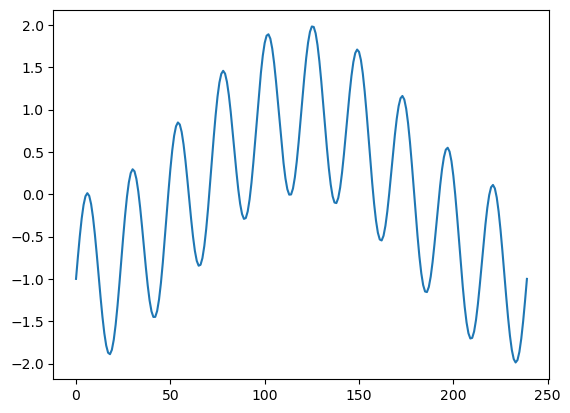

In [92]:
import numpy as np
import matplotlib.pyplot as plt

HOURS = 240
season = np.sin(np.linspace(-np.pi/2, 1.5*np.pi, HOURS))
day = np.sin(np.linspace(0, 2*np.pi*HOURS/24, HOURS))

signal = season + day 

plt.plot(signal)



Here we see an signal with both a seasonal (1x per signal) and daily trend (10x per signal, actually 365 wouldnt be visible)
The corresponding FT has distinct frequencies at 1 (seasonal) and 10 ("daily")

c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


<BarContainer object of 121 artists>

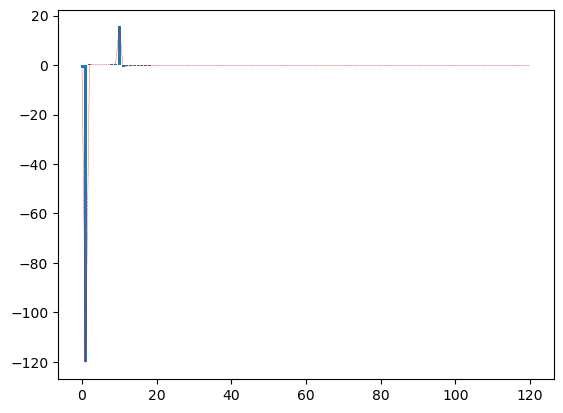

In [134]:
ft = np.fft.rfft(signal)
plt.plot(ft, "r--", linewidth=0.3)
plt.bar(np.arange(len(ft)),ft)

We can change these frequencies to change the final result. EG, lets remove the seasonal trend by setting the frequency of one to zero

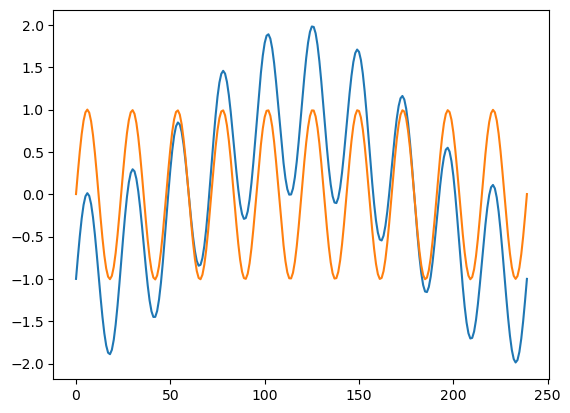

In [135]:
new_ft = ft
new_ft[1] = 0 # setting seasonal frequency to zero (1 is seasonal because its once per period (year))
changed = np.fft.irfft(new_ft)#
plt.plot(signal)
plt.plot(changed)


we can do the same to eliminate the daily frequencies at f=10, the frequencies will be "fuzzy" cause of the discrete nature. This can also be observed in the "yanky" start and end of the signal.

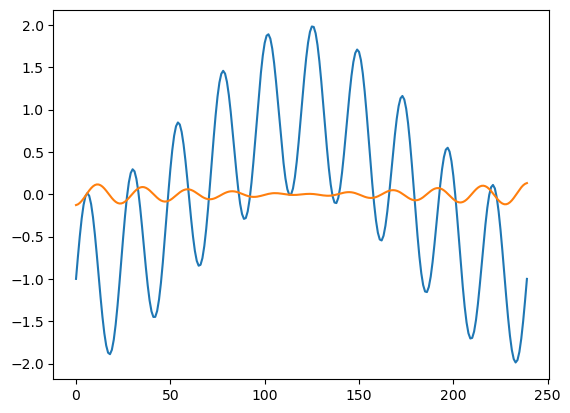

In [136]:
new_ft2 = ft
new_ft2[10] = 0 # setting daily frequency to zero (10 is daily because in the dataset there are 10 days, 
# so its a frequency of 10, in a 8760h dataset, the frequency will be 365 )
changed = np.fft.irfft(new_ft)
plt.plot(signal)
plt.plot(changed)


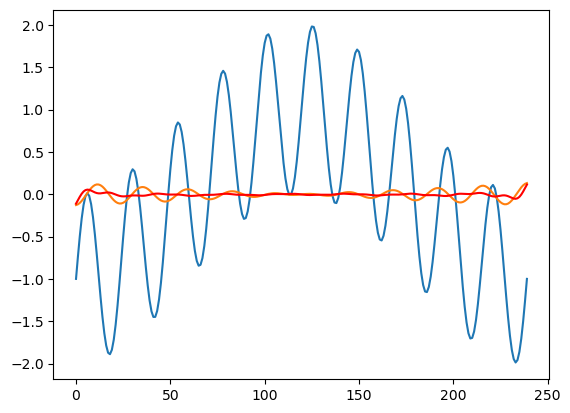

In [137]:

# as you can see in the frequency plot, there is also small freq contributions
#removing them aswell sharpens the signal, 
new_ft2 = ft
new_ft2[8:20] = 0 # setting daily frequency to zero (10 is daily because in the dataset there are 10 days, 
# so its a frequency of 10, in a 8760 dataset, the frequency will be 365 )
changed2 = np.fft.irfft(new_ft)
plt.plot(signal)
plt.plot(changed)
plt.plot(changed2, "r")

Now this can be used strip unwanted parts of a signal, such as seasonal and daily trends, by reducing the corresponding frequencies (by any factor, down to zero) and then regenerating the signal from the remaining frequency spectrum. here are the steps:
- normalize signal (so that its sum = 1) and keep the scaling factor signal.sum() for later reference: `normalized = signal / signal.sum()`
- convert to frequency space () with `ft = np.fft.rfft(normalized)` (Ft for only real components)
- manipulate `ft` frequencies, for example set all low frequencies below a certain threshold to 0, or do something like a high-pass filter, where the higher the frequency, the less it gets reduced and vice versa.
- regenerate the new signal with `new = no.fft.irfft(ft_new)` 
- the resulting signal will not be normalized, so do that and then scale accordingly to match the initial signal
- or dont and use the smaller signal by scaling with the initial factor to reflect that you really "threw away" certain parts of the signal


It can also be used to identify how "suitable" a signal will be to a certain flex control: Exactly then, when the frequencies match up.

This can be used to manipulate a given signal to exclude certain fre